## 1. Classification binaire avec des reseaux de neurones entierement connectes

### 1.1 Dataset

Creating Dataset

In [1]:
from sklearn.datasets import make_circles 

X,y = make_circles(n_samples= 1000, noise= 0.03)

Showing dimensions of the dataset

In [2]:
X.shape

(1000, 2)

In [3]:
y.shape[0]

1000

visualzing dataset

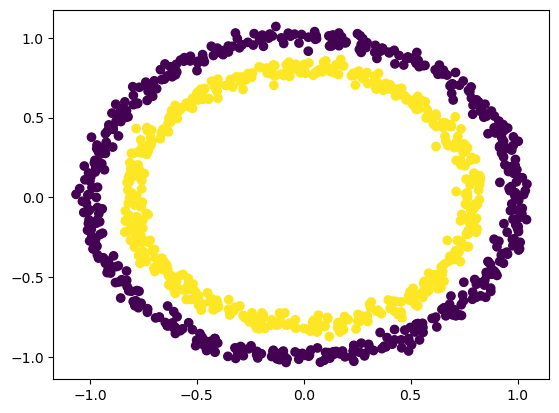

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

This dataset requires a non linear classifier in order to seperate between the classes since the distribution of samples can't be divided into two by a line.

Transforming tables

In [5]:
import torch
import numpy as np

X = torch.from_numpy(np.array(X)).type( torch . float )
y = torch.from_numpy(np.array(y)).type( torch . float )

Data split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 42)

### 1.2 Definition du modele

1- FCNN Implementation

In [7]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
class ModelV0(nn.Module):
    def __init__ ( self ) :
        super(). __init__ ()
        # Constructeur pour definir l’ architecture du modele
        self.layer_1= nn.Linear( in_features= 2, out_features= 5)
        self.layer_2= nn.Linear( in_features= 5, out_features= 1)

    # Propagation des donnees dans le modele
    def forward( self, x):
        return self.layer_2(self.layer_1(x))

In [9]:
model_0= ModelV0().to(device)

In [10]:
print(model_0)

ModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


2- Choosing the in and out dimensions of FCNN depends on the input and output. If we have binary clasification we will have a unique output, else we will have the same number of the input. It all depends from the input and the choice of the user.

3- In order to have a more complex understanding of the model and more calculations, we increment the number of hidden layers or the number of neurons  

4- In order to have a better trained model, we don't always increment the number of hidden layers or neurons, we can also play with the hyperparameters (nombre d'ittérations/taux d'apprentissage) so that we can extract more features

5- We have 5 neurons on the 2nd layer hence the number of feature 5 

In [11]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD ( params = model_0.parameters() ,lr=0.1)

7- BCWithLogitsloss uses a combination of the loss function and the activation function (sigmoide). while BCELoss only applies binary cross-entropy loss.

### 1.3  Entraınement du modele

1- Model Training

In [12]:
def accuracy_fn( y_true , y_pred ) :
    
    correct= torch.eq(y_true,y_pred).sum()
    accuracy= (correct/len(y_true))*100
    return accuracy

In [13]:
torch.manual_seed(42)

epochs = 100

# Envoyer le dataset a l appareil d execution
X_train , y_train = X_train.to( device ),y_train.to( device )
X_test , y_test = X_test.to( device ), y_test.to ( device )


In [14]:
for epoch in range (epochs):
    model_0.train()
    
    y_logits= model_0(X_train).squeeze()
    y_pred= torch.round(torch.sigmoid(y_logits ))

    loss= loss_fn(y_logits, y_train )
    acc= accuracy_fn ( y_true= y_train, y_pred= y_pred )
    


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
   
    with torch.inference_mode():

        test_logits = model_0( X_test ).squeeze()
        test_pred = torch.round( torch.sigmoid( test_logits ))

        test_loss = loss_fn( test_logits , y_test )
        test_acc = accuracy_fn( y_true = y_test , y_pred = test_pred )
    if epoch % 10 == 0 :
        print(test_loss)
        print(test_acc)


tensor(0.7142)
tensor(48.5000)
tensor(0.7053)
tensor(47.5000)
tensor(0.7008)
tensor(48.)
tensor(0.6982)
tensor(48.)
tensor(0.6967)
tensor(48.5000)
tensor(0.6957)
tensor(50.)
tensor(0.6951)
tensor(49.5000)
tensor(0.6947)
tensor(50.)
tensor(0.6944)
tensor(50.)
tensor(0.6943)
tensor(50.5000)


2- We notice that the accuracy is approximately 50%, which means that the model is underfitting and needs more training . In order to enhance the understanding of the complexity, we must increment of hidden layers and neurons hence extracting more features

### 1.4  Evaluation du modele

This function takes as input a trained model, and X and y. It first deffines a step size h for creating a mesh grid. This grid  will be used to make predictions for each point in the grid. We calculate the minimum and maximum values of the input data along both axes and create a mesh grid using numpy.meshgrid(). Then we apply the sigmoid function to the predicted values.

In [15]:
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Use the model to predict the class for each point in the grid
    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float().to(device))
    Z = torch.round(torch.sigmoid(Z.squeeze())).detach().cpu().numpy()
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()

We apply the plot_decision_boundary to the train set

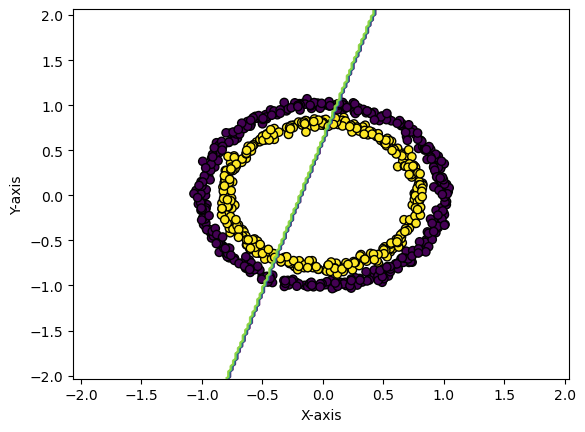

In [16]:
X_train_np = X_train.cpu().numpy()
y_train_np = y_train.cpu().numpy()
plot_decision_boundary(model_0, X_train_np, y_train_np)

We apply the plot_decision_boundary to the test set

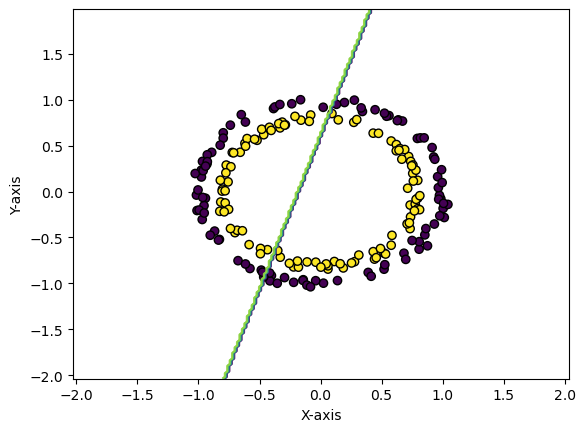

In [17]:
X_test_np = X_test.cpu().numpy()
y_test_np = y_test.cpu().numpy()
plot_decision_boundary(model_0, X_test_np, y_test_np)

2- The problem with this model is that it is underfitting. The accuracy is about 50%, which means that the model fails to capture the complexity of the data and make good predictions.

3- In order to improve the model performance. We can:

    - Add more hidden layers/neurones
    - Play with Hyperparameters (nb d'itaration/taux d'apprentissage)
    - Data Augmentation
    - Regularization
    - Use different activation technique
    - Use a different architecture

we are going to approach the method of increasing the number of hidden layers and neurons.

In [18]:
class ModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=20)
        self.layer_2 = nn.Linear(in_features=20, out_features=20)
        self.layer_3 = nn.Linear(in_features=20, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.batch_norm1(self.layer_1(x)))
        x = self.relu(self.batch_norm2(self.layer_2(x)))
        return self.layer_3(x)

model_1 = ModelV1().to(device)
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

The ModelV1 class is defined with two hidden layers, each with 20 neurons, and ReLU activation functions.

In [19]:
print(model_1)

ModelV1(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)


## 2. Classification multi-classes avec des reseaux de neurones entierement connectes

1- We begin by creating a multi class data with make_blobs() with 4 classes, 2 feature and 1000 samples

In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)


2- Tensor data transformation

In [21]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()


3- We split data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4- Data Visualisation

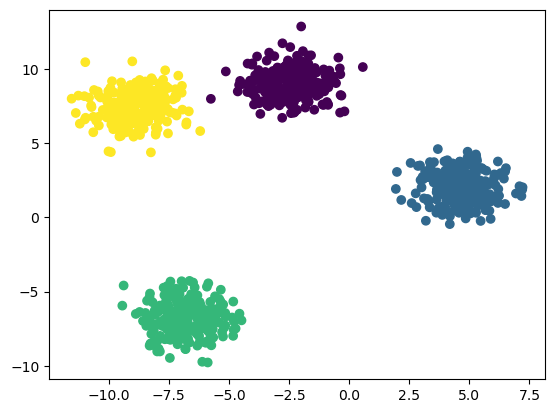

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


5- This dataset requires a non-linear classifier since the samples cannot be divided by a single line.

6- Proposed FCNN architecture in PyTorch for classifying this data:

    - 1 Hidden layer with 10 neurones
    - We use the ReLU activation function between the two layers to introduce non-linearity into the model

In [24]:
class MultiClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=4)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        return self.layer_2(x)

model = MultiClassModel().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


7- Model Training

In [25]:
def multi_class_accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = correct / len(y_true) * 100
    return accuracy

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 100
for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    y_pred = torch.argmax(y_logits, dim=1)
    loss = loss_fn(y_logits, y_train)
    acc = multi_class_accuracy(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_logits = model(X_test)
        test_pred = torch.argmax(test_logits, dim=1)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = multi_class_accuracy(y_test, test_pred)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss {loss:.4f}, Accuracy {acc:.2f}, Test Loss {test_loss:.4f}, Test Accuracy {test_acc:.2f}")


Epoch 0: Loss 5.5473, Accuracy 0.00, Test Loss 5.4737, Test Accuracy 0.00
Epoch 10: Loss 1.7101, Accuracy 49.88, Test Loss 1.6301, Test Accuracy 51.50
Epoch 20: Loss 0.4895, Accuracy 99.00, Test Loss 0.4206, Test Accuracy 98.00
Epoch 30: Loss 0.3235, Accuracy 95.50, Test Loss 0.2594, Test Accuracy 98.00
Epoch 40: Loss 0.1744, Accuracy 99.88, Test Loss 0.1545, Test Accuracy 99.50
Epoch 50: Loss 0.1107, Accuracy 99.88, Test Loss 0.0978, Test Accuracy 100.00
Epoch 60: Loss 0.0776, Accuracy 99.88, Test Loss 0.0679, Test Accuracy 100.00
Epoch 70: Loss 0.0584, Accuracy 99.88, Test Loss 0.0515, Test Accuracy 100.00
Epoch 80: Loss 0.0465, Accuracy 99.88, Test Loss 0.0420, Test Accuracy 100.00
Epoch 90: Loss 0.0388, Accuracy 99.88, Test Loss 0.0348, Test Accuracy 100.00


8- Calculate and display all classification metrics studied in the course:

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_true = y_test.cpu().numpy()
y_pred = test_pred.cpu().numpy()

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_mat = confusion_matrix(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_mat)


Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]


9- plot Decision Boundary

In [27]:
def plot_decision_boundary(model, X, y):
    # Create a mesh grid for the plot
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Get the model's predictions for the mesh grid
    X_grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float().to(device)
    y_pred = torch.argmax(torch.softmax(model(X_grid), dim=1), axis=1)
    y_pred = y_pred.cpu().numpy().reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contour(xx, yy, y_pred, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.show()


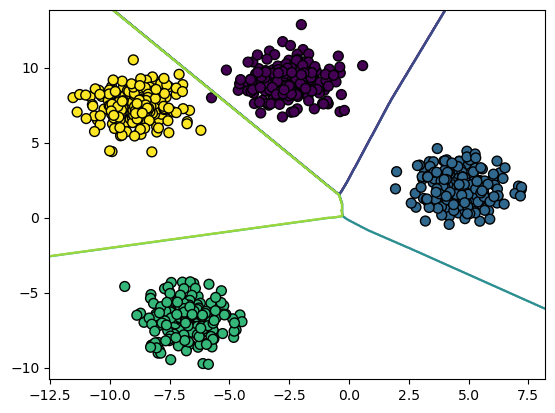

In [28]:
# Plot the decision boundaries for the training set
plot_decision_boundary(model, X_train.cpu().numpy(), y_train.cpu().numpy())

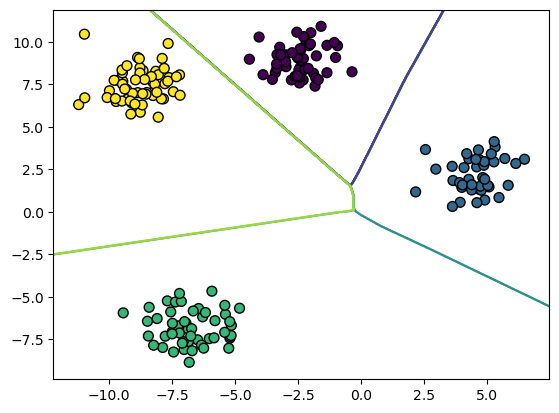

In [29]:
# Plot the decision boundaries for the test set
plot_decision_boundary(model, X_test.cpu().numpy(), y_test.cpu().numpy())

10- To study the impact of the increase in the number of samples in the dataset on classification accuracy, we can create datasets with different numbers of samples and train the model on them. Then, plot the accuracy as a function of the number of samples in the dataset.

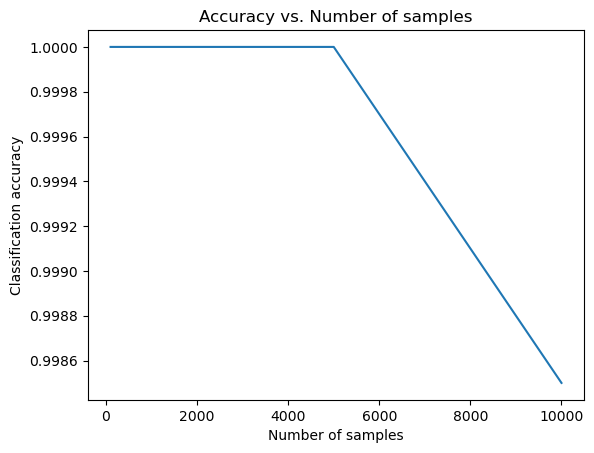

In [30]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_and_evaluate(num_samples):
    # Create a dataset with num_samples
    X, y = make_blobs(n_samples=num_samples, centers=4, random_state=42, n_features=2)
    X = torch.from_numpy(X).float()
    y = torch.from_numpy(y).long()

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = MultiClassModel()
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(100):
        optimizer.zero_grad()
        y_logits = model(X_train.to(device))
        loss = criterion(y_logits, y_train.to(device))
        loss.backward()
        optimizer.step()

    # Evaluate the model
    y_pred = torch.argmax(model(X_test.to(device)), axis=1)
    accuracy = accuracy_score(y_test.cpu().numpy(), y_pred.cpu().numpy())

    return accuracy

# Number of samples to test
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]

# Train and evaluate the model for each sample size
accuracies = [train_and_evaluate(num_samples) for num_samples in sample_sizes]

# Plot the results
plt.plot(sample_sizes, accuracies)
plt.xlabel('Number of samples')
plt.ylabel('Classification accuracy')
plt.title('Accuracy vs. Number of samples')
plt.show()


11- To study the impact of the optimizer and the loss/activation functions, we can train and evaluate the model using different values for these variables. For optimizers, the most common ones are Stochastic Gradient Descent (SGD), Adam, and RMSprop. For the loss function in a multi-class classification, CrossEntropyLoss is a popular choice. Finally for activation functions, we can try ReLU, LeakyReLU, sigmoid, or Tanh.

12- The main challenges of using FCNNs in real-world applications are:
Scalability: FCNNs tend to have a large number of parameters, which makes them difficult to scale to large datasets or high-dimensional input data.
Overfitting: FCNNs can easily overfit the training data, especially when there are a large number of parameters or the dataset is small.

These challenges can be overcome by using other types of neural networks, such as Convolutional Neural Networks (CNNs) or Recurrent Neural Networks (RNNs). For the overfitting we can use regularization techniques, such as dropout and early stopping.

13- FCNNs can be used to solve real-world problems like fraud detection or face recognition by transforming the input data into a feature vector then we give it to our network. 
For example, in fraud detection, we might use features like transaction details, timestamp, and previous history to train the model. 
In the other hand, for the face recognition, we can use features extracted from an image using various techniques in order to feed them to our network.